# Clustering Stars by Temperature and Luminosity on the Hertzsprung-Russell Diagram

In [42]:
# load all libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


In [43]:
# Load the dataset
data = pd.read_csv('filteredGaia.csv')

# Drop the first column
data.drop(data.columns[0], axis=1, inplace=True)

# Select columns to normalize
columns = ['Teff', 'Lum-Flame']

scaler = MinMaxScaler()
# data[columns] = scaler.fit_transform(data[columns])

# Save the normalized data
data.to_csv('normalizedGaia.csv', index=False)
dataN = pd.read_csv('normalizedGaia.csv')

/var/folders/b9/dh_d_rc51q1915gpp_pdvlch0000gn/T/ipykernel_23282/2357646030.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Spectral Type')


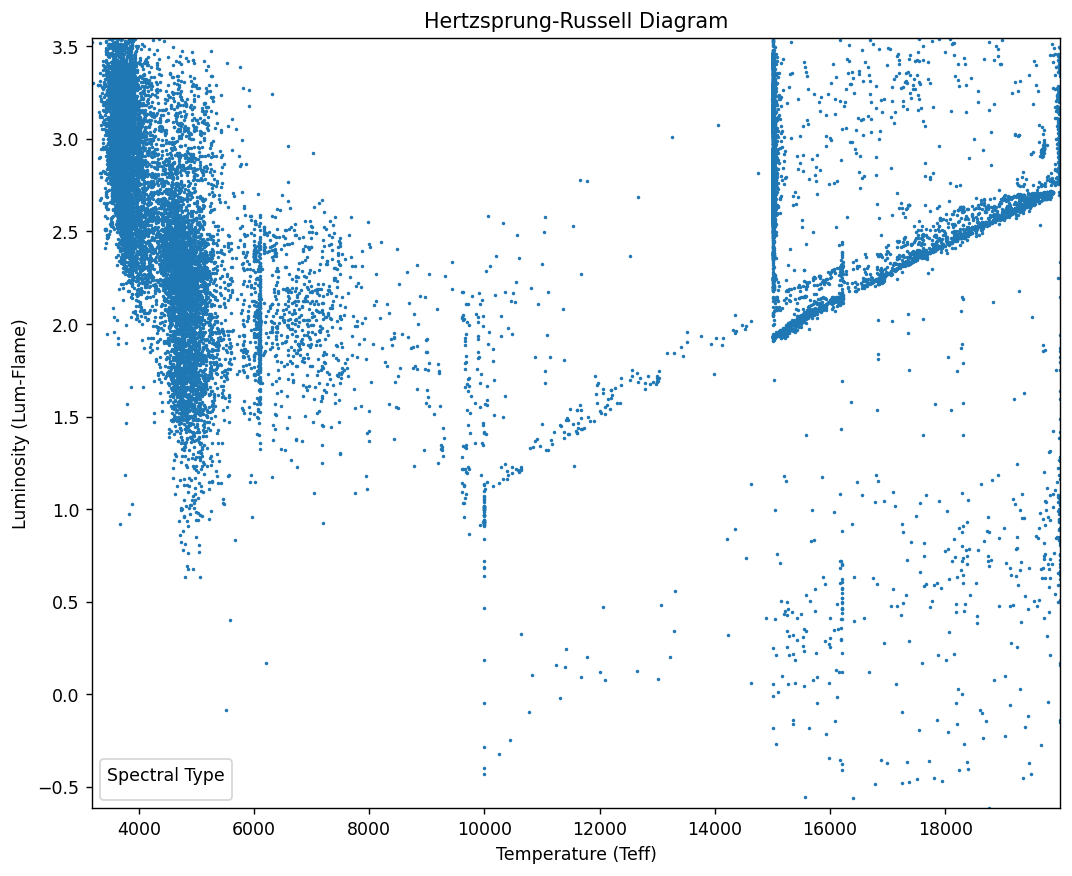

In [44]:
# Visualize the dataset with a scatter plot
# 10 groups (10 groups - White dwarfs, Giants, Supergiants, MainSequence-O, B, A, F, K, G, M)
# Use color to indicate the label?

# Visualize the dataset with a scatter plot
x1 = data['Teff'].values
y1 = data['Lum-Flame'].values

# Apply log base 10 transformation to y1
y1_log = np.log10(y1)

# Remove values where y1_log is not defined (NaN or infinite)
mask = np.isfinite(y1_log)
x1 = x1[mask]
y1_log = y1_log[mask]

maxX1 = max(x1)
minX1 = min(x1)
maxY1 = max(y1_log)
minY1 = min(y1_log)

# Create a scatter plot
plt.figure(figsize=(10, 8), dpi=125)
plt.plot(x1, y1_log, 'o', markersize=1)

# Add labels and title
plt.xlabel('Temperature (Teff)')
plt.ylabel('Luminosity (Lum-Flame)')
plt.title('Hertzsprung-Russell Diagram')
plt.legend(title='Spectral Type')

plt.xlim(minX1, maxX1)  # Adjust these values based on your data range
plt.ylim(minY1, maxY1)  # Adjust these values based on your data range

plt.show()

In [45]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=10)

In [46]:
# Visualize the clustering result